### Libs preparation

In [1]:
import sys
import os

sys.path.append('..')

# **Questão 1**

In [2]:
from scipy.stats import beta
import numpy as np

Estimando a solução da média da posteriori para $p(\theta | D) = Beta(\theta | a=9, b=3)$

In [18]:
beta.mean(9, 3)

0.75

Estimando a solução da média da posteriori para $p(\theta | D) = Beta(\theta | a=10, b=4)$

In [19]:
beta.mean(10, 4)

0.7142857142857143

Plotando as distribuições

In [3]:
import matplotlib.pyplot as plt

In [12]:
def likelihood(x, n_1, n):
    return np.power(x, n_1) * np.power((1 - x), (n - n_1))

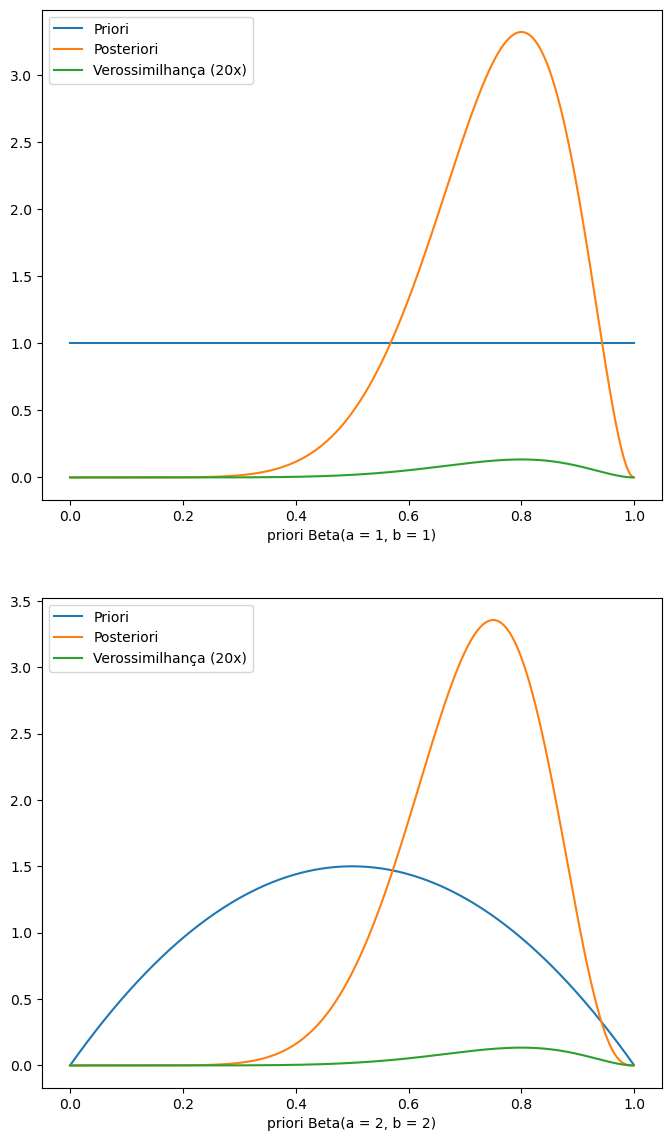

In [36]:
rng = np.arange(0, 1, 1e-3)

fig, axs = plt.subplots(2, 1, figsize=(8, 14))

axs[0].plot(rng, beta.pdf(rng, 1, 1))
axs[0].plot(rng, beta.pdf(rng, 9, 3))
axs[0].plot(rng, 20*likelihood(rng, 8, 10))
axs[0].legend(['Priori', 'Posteriori', 'Verossimilhança (20x)'])
axs[0].set_xlabel('priori Beta(a = 1, b = 1)')

axs[1].plot(rng, beta.pdf(rng, 2, 2))
axs[1].plot(rng, beta.pdf(rng, 10, 4))
axs[1].plot(rng, 20*likelihood(rng, 8, 10))
axs[1].legend(['Priori', 'Posteriori', 'Verossimilhança (20x)'])
axs[1].set_xlabel('priori Beta(a = 2, b = 2)')

fig.savefig('./plots/trab1/plot.png')

# **Questão 2**

### Data preparation

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('../data/cleaned_reviews.csv').dropna()

In [24]:
df.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0


In [6]:
X = df['cleaned_review']
y = LabelEncoder().fit_transform(df['sentiments'])

In [7]:
from amaprob.models.bernoulli_naive_bayes import BernoulliNaiveBayes
from sklearn.metrics import accuracy_score

In [27]:
def train_and_evaluate_model(a: int, b: int, X: np.ndarray, y: np.ndarray, random_state: int):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1000, random_state=random_state, shuffle=True)

    encoder = CountVectorizer(binary=True).fit(X_train)
    X_train = encoder.transform(X_train).toarray()
    X_test = encoder.transform(X_test).toarray()

    model = BernoulliNaiveBayes(a, b)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    return accuracy_score(y_test, y_pred)

In [28]:
seeds = np.arange(20)

In [29]:
from time import time

In [30]:
start_time = time()

experiment_1 = np.array([train_and_evaluate_model(1, 1, X, y, seed) for seed in seeds])

exp_1_time = time()

print(f'Experiment 1 done with elapsed time = {exp_1_time - start_time}')

experiment_2 = np.array([train_and_evaluate_model(0.5, 0.5, X, y, seed) for seed in seeds])

exp_2_time = time()

print(f'Experiment 2 done with elapsed time = {exp_2_time - exp_1_time}')

experiment_3 = np.array([train_and_evaluate_model(2, 2, X, y, seed) for seed in seeds])

exp_3_time = time()

print(f'Experiment 3 done with elapsed time = {exp_3_time - exp_2_time}')

Experiment 1 done with elapsed time = 320.01244711875916
Experiment 2 done with elapsed time = 323.26592922210693
Experiment 3 done with elapsed time = 300.6977779865265


In [32]:
print('Experiment 1:')
print(f'Accuracy: {np.mean(experiment_1)}')
print(f'Std: {np.std(experiment_1)}')
print('====================')
print('Experiment 2:')
print(f'Accuracy: {np.mean(experiment_2)}')
print(f'Std: {np.std(experiment_2)}')
print('====================')
print('Experiment 3:')
print(f'Accuracy: {np.mean(experiment_3)}')
print(f'Std: {np.std(experiment_3)}')

Experiment 1:
Accuracy: 0.6784936034767705
Std: 0.02783628011695007
Experiment 2:
Accuracy: 0.6561210748607456
Std: 0.025207969166013606
Experiment 3:
Accuracy: 0.6902001591479463
Std: 0.023414680365307562
